In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alexa=pd.read_csv("C:\\Users\\HP\\Desktop\\AnalytixLabs\\DATA SCIENCE\\amazon-review\\amazon_alexa.tsv",sep="\t")

In [3]:
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [5]:
alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [69]:
alexa.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64


### let's analyze some data

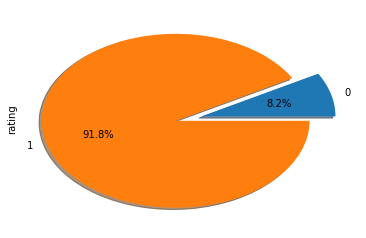

In [6]:

#Percentage of people who liked and disliked Alexa.
alexa.groupby("feedback").rating.count().plot(kind="pie",shadow=True, autopct='%1.1f%%',explode=(0.1,0.1));

In [7]:
#Length of reviews given by people
alexa["length"]=alexa.verified_reviews.apply(len)
alexa.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


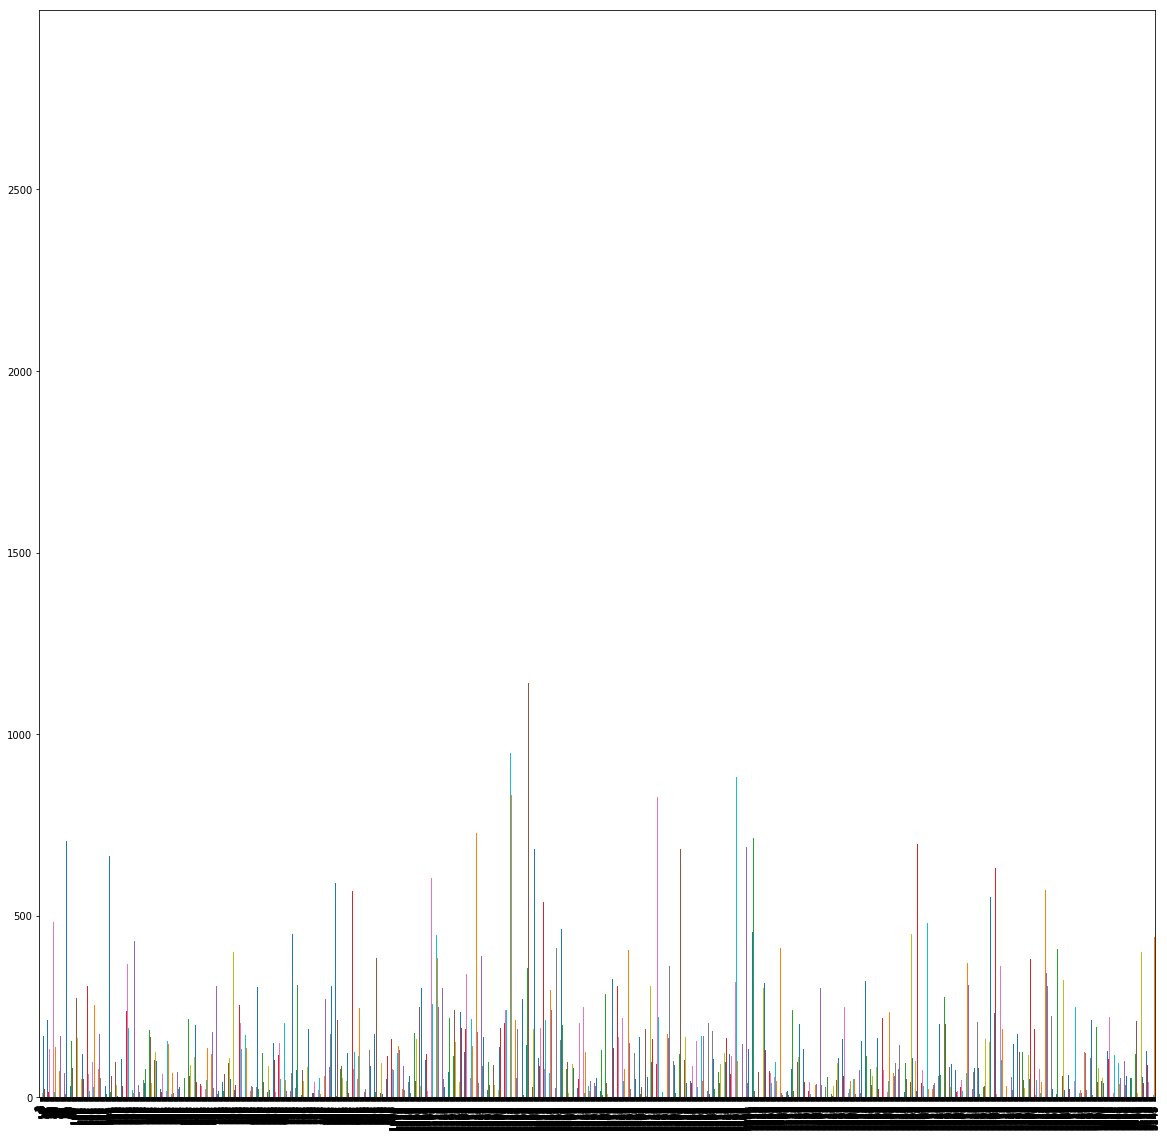

In [38]:
plt.figure(figsize=(20,20))
alexa.length.plot(kind="bar")



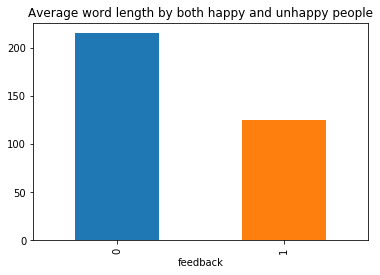

In [9]:
#Who expressed their feelings better. Either sad people or happy people?
alexa.groupby("feedback").length.mean().plot(kind="bar");
plt.title("Average word length by both happy and unhappy people");

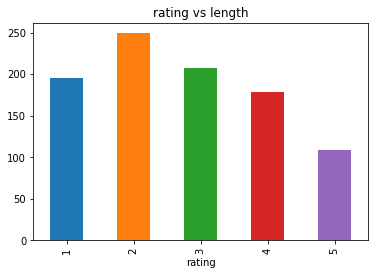

In [34]:
#Seems unhappy people expressed with more words

alexa.groupby("rating").length.mean().plot(kind="bar");
plt.title("rating vs length");

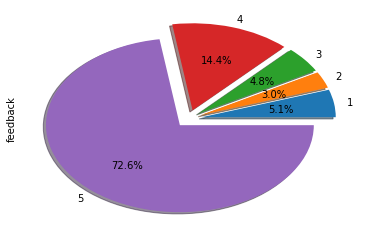

In [10]:
#Ratings distribution
alexa.groupby("rating").feedback.count().plot(kind="pie",shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1))


In [11]:
#Ok so the people are happy about it

#Let us visualize some words which people use for expressing positive as well as negative reviews


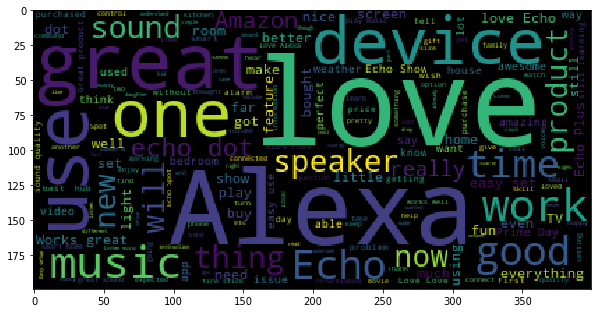

In [12]:
#Positive words
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
from wordcloud import WordCloud
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,10))
plt.imshow(cv)


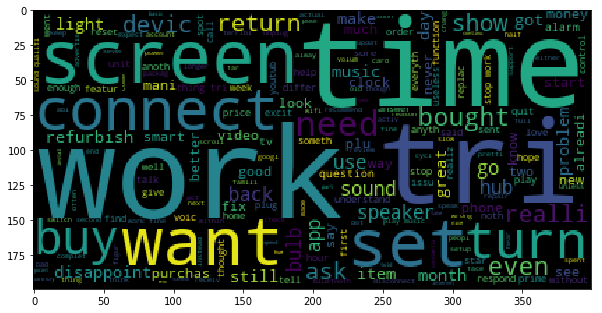

In [35]:
#Negative reviews
bad=alexa[alexa.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(bad)
from wordcloud import WordCloud
cv=WordCloud().generate(bad)
cv
plt.figure(figsize=(10,10))
plt.imshow(cv)

In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Comparing both wordcloud and creating a list of words that occur in both oftenly including stopwords
common=["Amazon","device","Alexa","one","Echo","work","product"]
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["Amazon","device","Alexa","one","Echo","work","product","amazon","alexa","thing","echo","dot","use"])

In [81]:
#There are a couple of extra non alphabetic characters and numbers present in the review section. So we need to remove 
#those undesirable characters for creating a better model.


In [15]:
#Converting to lower case
alexa.verified_reviews=alexa.verified_reviews.str.lower()
#Removing special characters ("[^a-z]">> This signifies that replace everything apart from lower case alphabets with white space)
alexa.verified_reviews=alexa.verified_reviews.str.replace("[^a-z]"," ")

In [16]:
#split into a list
alexa.verified_reviews=alexa.verified_reviews.str.split()
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x:[word for word in x if word not in stop])
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x: " ".join(word for word in x))

In [49]:
#Now the stopwords and common word has been removed. We can keep on adding irrelevant word to stop list and run 
#the code again for better model creation

#Again Creating wordcloud


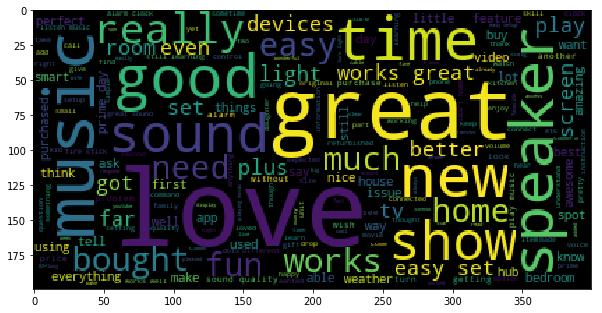

In [17]:
#Positive words
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
from wordcloud import WordCloud
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

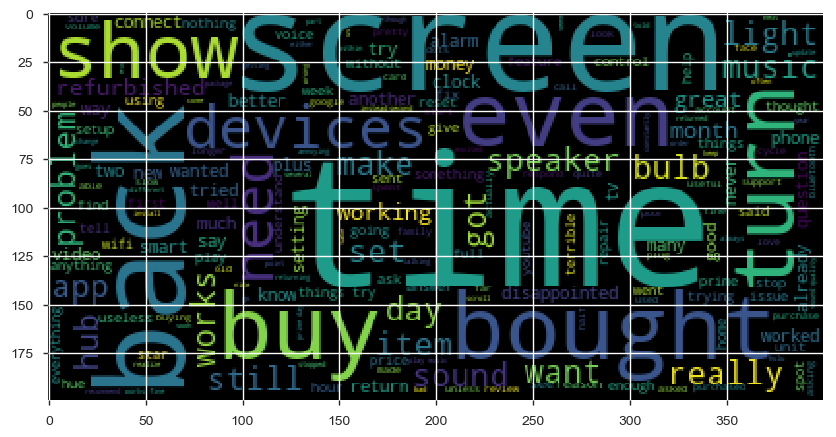

In [51]:
#Negative reviews
bad=alexa[alexa.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(bad)
from wordcloud import WordCloud
cv=WordCloud().generate(bad)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

In [18]:
#Now our wordcloud look a bit better with different work, Removing irrelevant words can help in attaining great accuracy.

#Now we can go for Sentiment Analysis using some common models like Decison tree, Random Forest and SVM and 
#compare the accuracies


In [19]:

alexa.verified_reviews=alexa.verified_reviews.str.split()
alexa.verified_reviews.astype(str)

0                                                ['love']
1                                               ['loved']
2       ['sometimes', 'playing', 'game', 'answer', 'qu...
3       ['lot', 'fun', 'yr', 'old', 'learns', 'dinosau...
4                                               ['music']
5       ['received', 'gift', 'needed', 'another', 'blu...
6       ['without', 'cellphone', 'cannot', 'many', 'fe...
7       ['think', 'th', 'purchased', 'working', 'getti...
8                                      ['looks', 'great']
9       ['love', 'listened', 'songs', 'heard', 'since'...
10      ['sent', 'year', 'old', 'dad', 'talks', 'const...
11      ['love', 'learning', 'knew', 'things', 'eveyda...
12      ['purchased', 'mother', 'knee', 'problems', 'g...
13                               ['love', 'love', 'love']
14                                           ['expected']
15                              ['love', 'wife', 'hates']
16      ['really', 'happy', 'purchase', 'great', 'spea...
17      ['usin

In [84]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [20]:
#Using wordlemmatizer to remove any plural word like "dogs" will become "dog"
from nltk.stem import WordNetLemmatizer
wll=WordNetLemmatizer()
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x:[wll.lemmatize(word) for word in x])


In [21]:
#Using portstemmer to convert words to its base form
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x:" ".join([ps.stem(word) for word in x]))

alexa.head(10)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,love,1,13
1,5,31-Jul-18,Charcoal Fabric,love,1,9
2,4,31-Jul-18,Walnut Finish,sometim play game answer question correctli sa...,1,195
3,5,31-Jul-18,Charcoal Fabric,lot fun yr old learn dinosaur control light pl...,1,172
4,5,31-Jul-18,Charcoal Fabric,music,1,5
5,5,31-Jul-18,Heather Gray Fabric,receiv gift need anoth bluetooth someth play m...,1,172
6,3,31-Jul-18,Sandstone Fabric,without cellphon cannot mani featur ipad see g...,1,365
7,5,31-Jul-18,Charcoal Fabric,think th purchas work get everi room hous real...,1,221
8,5,30-Jul-18,Heather Gray Fabric,look great,1,11
9,5,30-Jul-18,Heather Gray Fabric,love listen song heard sinc childhood get news...,1,114


In [24]:
#Now our data set seems to be ready for furthur process. Since the machine wont understand meaning of these words so we need to vectorize them. We will create multiple models.

#Supervised learning with positive and negative reviews
#Unsupervised by clustering.
#Supervised learning


from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(alexa.verified_reviews)
X=X.toarray()

In [25]:
y=alexa.feedback.tolist()
y=np.asarray(y)
y.shape,X.shape

((3150,), (3150, 2760))

In [26]:
#Converted all words to vectors. Now we will split the data into training and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
y_pred_dc=dc.predict(X_test)

y_pred_rf=rc.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score_dc=accuracy_score(y_test,y_pred_dc)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score_rf=accuracy_score(y_test,y_pred_rf)


In [32]:
from sklearn import svm
sv=svm.SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
accuracy_score_sv=accuracy_score(y_test,y_pred_sv)

In [33]:
print("Decision Tree Accuracy=",accuracy_score_dc)
print("Random Forest=",accuracy_score_rf)
print("SVM accuracy=",accuracy_score_sv)

Decision Tree Accuracy= 0.9238095238095239
Random Forest= 0.9317460317460318
SVM accuracy= 0.9142857142857143
